<a href="https://colab.research.google.com/github/matheusbuenowb/Data-Mining-Bee-Colony/blob/main/Atividade_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Bees are essential to the environmental structure of our world, as well as sustaining humanity. Not only are they part of the food chain, they also pollinate as both specialist and generalists. 1/3 of our food source depends on bee pollination. Thus, humans must take more actions to protect these vital insects.
- BeeAudio Dataset is an initiative to encourage computational means of addressing bee population decline, such as through creating machine learning algorithms to remotely and instantly detect the health status of the hive via sound data. This is the largest single dataset of bee audio, alongside multi-dimensional data, and it was all collected with a custom IoT device combining an ESP32 Wi-Fi module, INMP441 microphone module, and a BME280 temperature/humidity sensor.
- All data is original from European Honey Bee hives in California, and it is split in 60 second chunks. There are 7100 samples in total.

link: https://www.kaggle.com/datasets/annajyang/beehive-sounds?select=all_data_updated.csv

#Importação da base de dados


In [ ]:
import pandas as pd

df = pd.read_csv("all_data_updated_att.csv")

#Alterações para corrigir alguns dados NaN, deixei comentado

In [ ]:


#Selecionar linhas que têm valores nulos em qualquer coluna
#df_nulos = df[df.isnull().any(axis=1)]

#Exibir as linhas com valores nulos
#df = df.drop(columns=['gust speed'])

#df

#df_nulos = df[df.isnull().any(axis=1)]

#df_nulos.count()

#df.info()



In [ ]:


#Verifica se há existem valores NaN em todo o DataFrame
#nan_check = df.isna()

#Exibi o df com True para NaN e False para valores válidos
#nan_check



#Conta os valores NaN por coluna
#nan_count = df.isna().sum()

#print(nan_count)



In [ ]:
#Substitui os valores nulos pelas médias

#df['weather temp'] = df['weather temp'].fillna(df['weather temp'].mean())
#df['wind speed'] = df['wind speed'].fillna(df['wind speed'].mean())
#df['lat'] = df['lat'].fillna(df['lat'].mean())
#df['long'] = df['long'].fillna(df['long'].mean())

In [ ]:
df.count()

,0
device,1275
hive number,1275
date,1275
hive temp,1275
hive humidity,1275
hive pressure,1275
weather temp,1275
weather humidity,1275
weather pressure,1275
wind speed,1275


In [ ]:


#Preencher valores NaN com a média de cada coluna numérica
#df = df.fillna(df.mean(numeric_only=True))

#df= df.dropna()


In [ ]:
#df.count()

# Seleção de features, normalização de dados e divisão de treino x teste


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import joblib  # Para salvar e carregar o modelo

# Tratando valores ausentes
#df = df.dropna()  # Remove linhas com valores nulos (ou use fillna para preencher)

#Selecionando as features (variáveis preditoras)
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']
X = df[features]
y = df['queen presence']  #Rótulo a ser previsto


#Garante que os dados são numéricos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

#Garante que y contém apenas valores binários (1 ou 0)
y = y.apply(lambda x: 1 if x > 0 else 0)

#Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def plotValues(x, name, estimators_values, accuracy_scores, scale):
  plt.figure(figsize=(10, 5))
  plt.plot(estimators_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
  plt.xlabel(f'{x}')
  plt.ylabel('Acurácia Média')
  plt.title(f'{name}')
  plt.xticks(estimators_values)
  plt.xscale(f'{scale}')  # Escala logarítmica para melhor visualização
  plt.grid()
  plt.show()

def trainModel(model, nameSave):
  #Treina o modelo com todos os dados de treino
  model.fit(X_train, y_train)

  #Faz previsões no conjunto de teste
  y_pred = model.predict(X_test)

  #Avalia o desempenho do modelo
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia do modelo no conjunto de teste: {accuracy:.2f}")

  #Salva o modelo treinado com o joblib
  joblib.dump(model, f'{nameSave}')
  print(f"Modelo salvo em '{nameSave}'")

def newDataPrediction(modelName):
  #Carrega o modelo para novas previsões
  loaded_model = joblib.load(f'{modelName}')

  #Supondo um novo conjunto de dados para teste
  new_data = pd.DataFrame({
      'hive temp': [35.0], 'hive humidity': [30.0], 'hive pressure': [1008.0],
      'weather temp': [25.0], 'weather humidity': [50.0], 'weather pressure': [1013.0],
      'wind speed': [5.0], 'rain': [0]
  })

  new_prediction = loaded_model.predict(new_data)
  print(f"Previsão para novos dados de verão (presença da rainha): {new_prediction[0]}")


  #Supondo que esteja no inverno (temperatura bem baixa aliada com uma alta umidade)
  #Nete caso a rainha estará ausente

  new_data = pd.DataFrame({
      'hive temp': [5.0], 'hive humidity': [80.0], 'hive pressure': [1008.0],
      'weather temp': [-2.0], 'weather humidity': [90.0], 'weather pressure': [1013.0],
      'wind speed': [5.0], 'rain': [0]
  })

  # Fazendo previsões com novos dados
  new_prediction = loaded_model.predict(new_data)
  print(f"Previsão para novos dados de inverno (presença da rainha): {new_prediction[0]}")




#Aplicando Random Forest

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor N.

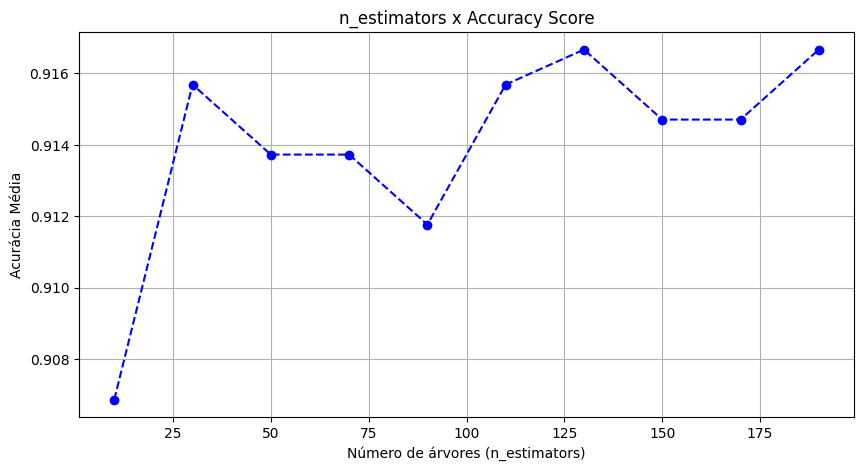

Melhor valor de n_estimators: 130
Acurácia do modelo no conjunto de teste: 0.93
Modelo salvo em 'random_forest_queen_model.pkl'
Previsão para novos dados de verão (presença da rainha): 1
Previsão para novos dados de inverno (presença da rainha): 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Avalia diferentes valores de n_estimators, para ver qual seria mais adequado para o modelo
n_estimators_values = range(10, 210, 20)
accuracy_scores = []

for n in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

plotValues('Número de árvores (n_estimators)','n_estimators x Accuracy Score', n_estimators_values, accuracy_scores, 'linear')

#Escolhe o melhor n_estimators baseado na maior acurácia
best_n = n_estimators_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de n_estimators: {best_n}")

#Cria o modelo RandomForest com o melhor n_estimators
model = RandomForestClassifier(n_estimators=best_n, random_state=42)


trainModel(model, 'random_forest_queen_model.pkl')

#Carrega o modelo para novas previsões
newDataPrediction('random_forest_queen_model.pkl')


#Aplicando KNN

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor de K.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#AVALIA de diferentes valores de k
k_values = range(1, 31, 2)  # Testa valores ímpares de k para evitar empates
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

plotValues('Número de Vizinhos (k)','k vs Accuracy Score', k_values, accuracy_scores, 'linear')


# Escolhendo o melhor k baseado na maior acurácia
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de k: {best_k}")

# Criando o modelo KNN com o melhor k
model = KNeighborsClassifier(n_neighbors=best_k)

trainModel(model, 'knn_queen_model.pkl')

# Carregando o modelo para novas previsões

newDataPrediction('knn_queen_model.pkl')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py", line 508, in _fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


#SVM MODEL

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor de C.


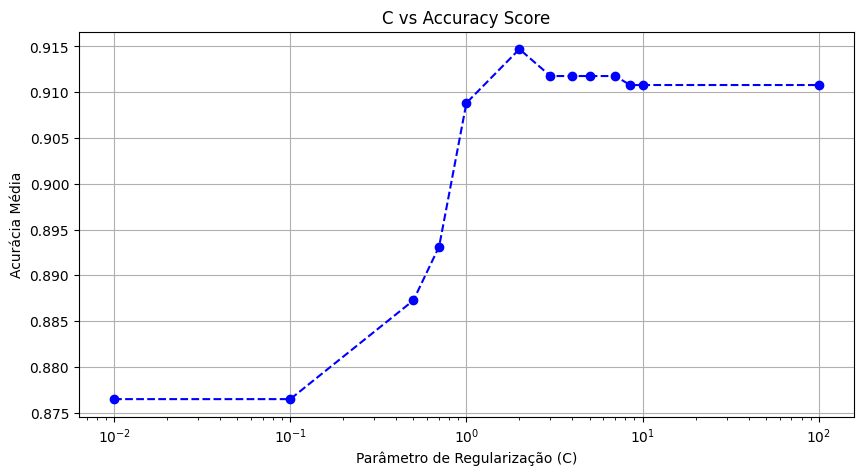

Melhor valor de C: 2
Acurácia do modelo no conjunto de teste: 0.92
Modelo salvo em 'svm_queen_model.pkl'
Previsão para novos dados de verão (presença da rainha): 1
Previsão para novos dados de inverno (presença da rainha): 1


In [ ]:
from sklearn.svm import SVC

# Avaliação de diferentes valores de C (parâmetro de regularização)
c_values = [0.01, 0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 7, 8.5, 10, 100]
accuracy_scores = []

for c in c_values:
    model = SVC(C=c, kernel='rbf', random_state=42, gamma = 0.08)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

plotValues('Parâmetro de Regularização (C)','C vs Accuracy Score', c_values, accuracy_scores, 'log')

#Escolhe o melhor C baseado na maior acurácia
best_c = c_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de C: {best_c}")

#cRIA o modelo SVM com o melhor C
model = SVC(C=best_c, kernel='rbf', random_state=42, probability=True, gamma = 0.08) #0.08

trainModel(model, 'svm_queen_model.pkl')


#Carrega o modelo para novas previsões

newDataPrediction('svm_queen_model.pkl')



# Modelo do Gradiente Boosting

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor do hiperparâmetro N.

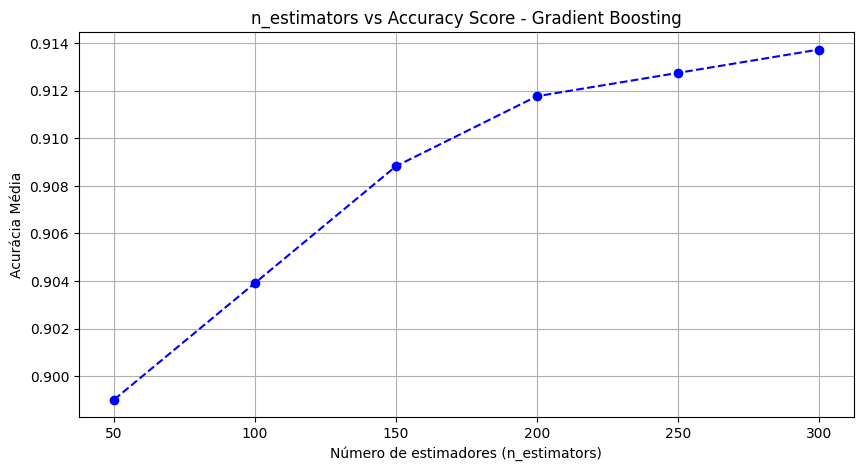

Melhor valor de n_estimators: 300
Acurácia do modelo no conjunto de teste: 0.93
Modelo salvo em 'gradient_boosting_queen_model.pkl'
Previsão para novos dados de verão (presença da rainha): 1
Previsão para novos dados de inverno (presença da rainha): 0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Avaliação de diferentes valores de n_estimators

n_estimators_values = range(50, 310, 50)
accuracy_scores = []

for n in n_estimators_values:
    model = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

plotValues('Número de estimadores (n_estimators)','n_estimators vs Accuracy Score - Gradient Boosting',
           n_estimators_values, accuracy_scores, 'linear')

# Escolhendo o melhor n_estimators baseado na maior acurácia
best_n = n_estimators_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de n_estimators: {best_n}")

# Criando o modelo Gradient Boosting com o melhor n_estimators
model = GradientBoostingClassifier(n_estimators=best_n, learning_rate=0.1, random_state=42)

trainModel(model, 'gradient_boosting_queen_model.pkl')

# Carregando o modelo para novas previsões
newDataPrediction('gradient_boosting_queen_model.pkl')



#Treinamento com regressão

In [145]:
# Define as features disponíveis (excluindo a que queremos prever)
features = ['hive temp', 'hive humidity', 'weather temp', 'weather humidity',
            'weather pressure', 'wind speed', 'rain']
X = df[features]

# Target: o que queremos prever
y = df['hive pressure']

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plotValuesRegressor(x, name, estimators_values, r2_scores, scale):
  plt.figure(figsize=(10, 5))
  plt.plot(estimators_values, r2_scores, marker='o', linestyle='dashed', color='g')
  plt.xlabel(f'{x}')
  plt.ylabel('R² Médio (Cross-Validation)')
  plt.title(f'{name}')
  plt.xticks(estimators_values)
  plt.xscale(f'{scale}')
  plt.grid()
  plt.show()

def trainModelRegressor(model, nameSave):
  #Treina o modelo com todos os dados de treino
  model.fit(X_train, y_train)

  # Avaliando no conjunto de teste
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"MSE no teste: {mse:.2f}")
  print(f"R² no teste: {r2:.2f}")

#Random Forest Regressor

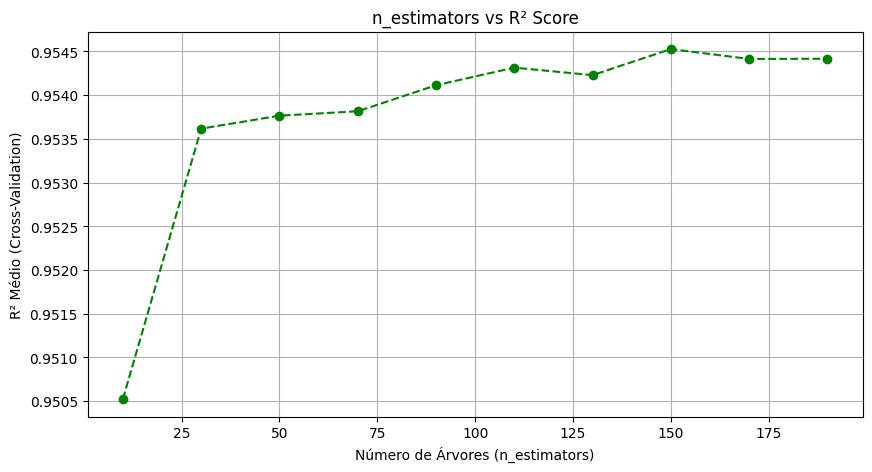

Melhor n_estimators: 150
MSE no teste: 0.26
R² no teste: 0.96


In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Avaliação com diferentes n_estimators
n_estimators_values = range(10, 210, 20)
r2_scores = []

for n in n_estimators_values:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  # Regressão usa R², não acurácia
    r2_scores.append(scores.mean())

plotValuesRegressor('Número de Árvores (n_estimators)', 'n_estimators vs R² Score',
                    n_estimators_values, r2_scores, 'linear')

# Melhor n_estimators
best_n = n_estimators_values[r2_scores.index(max(r2_scores))]
print(f"Melhor n_estimators: {best_n}")

# Treinando o modelo final
model = RandomForestRegressor(n_estimators=best_n, random_state=42)
trainModelRegressor(model, 'random_forest_regressor_model.pkl')



#Usando KNN Regressor

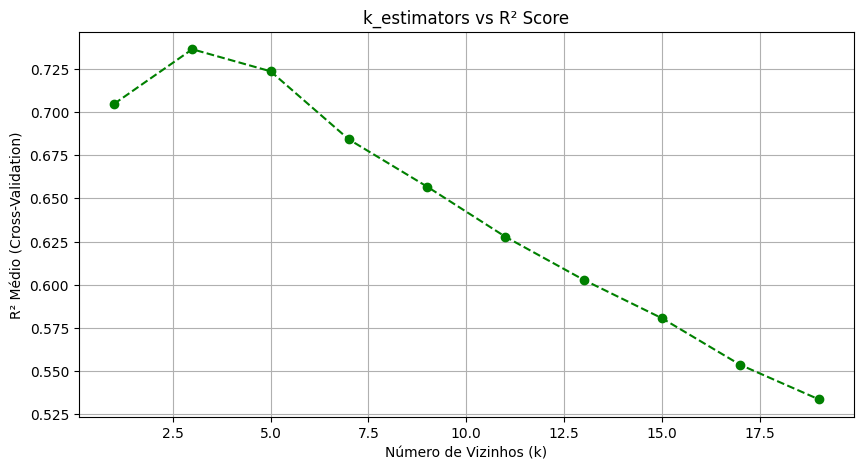

Melhor valor de k: 3
MSE no teste: 1.34
R² no teste: 0.77


In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Avaliação com diferentes valores k
k_values = range(1, 21, 2)
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors= k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  # Regressão usa R², não acurácia
    r2_scores.append(scores.mean())

plotValuesRegressor('Número de Vizinhos (k)', 'k_estimators vs R² Score',
                    k_values, r2_scores, 'linear')

# Escolhendo o melhor k
best_k = k_values[r2_scores.index(max(r2_scores))]
print(f"Melhor valor de k: {best_k}")


# Treinando o modelo com o melhor k
model = KNeighborsRegressor(n_neighbors=best_k)
trainModelRegressor(model, 'knn_regressor_model.pkl')


#SVM Regressor

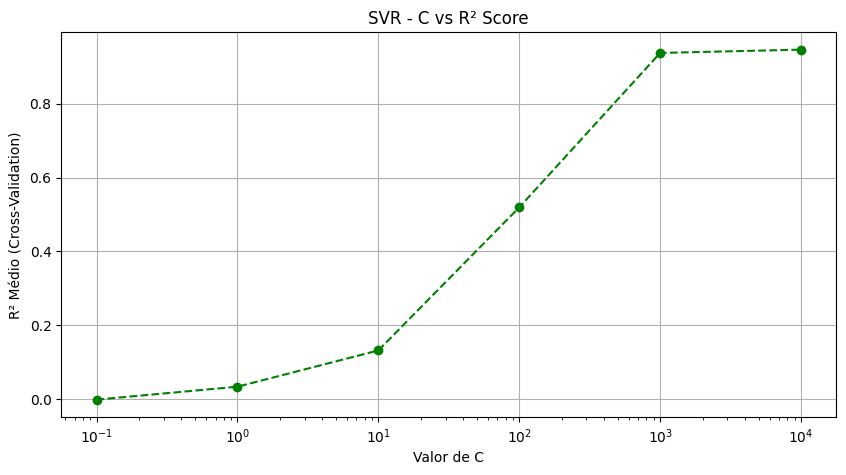

Melhor valor de C: 10000
MSE no teste: 0.36
R² no teste: 0.94


In [166]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Testando diferentes valores de C
C_values = [ 0.1, 1, 10, 100, 1000, 10000]
r2_scores = []

for C in C_values:
    model = SVR(kernel='rbf', C=C)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    r2_scores.append(scores.mean())


plotValuesRegressor('Valor de C', 'SVR - C vs R² Score',
                    C_values, r2_scores, 'log')

# Melhor C
best_C = C_values[r2_scores.index(max(r2_scores))]
print(f"Melhor valor de C: {best_C}")

# Treinamento e avaliação final
model = SVR(kernel='rbf', C=best_C)

trainModelRegressor(model, 'svm_regressor_model.pkl')


#Gradient Regressor

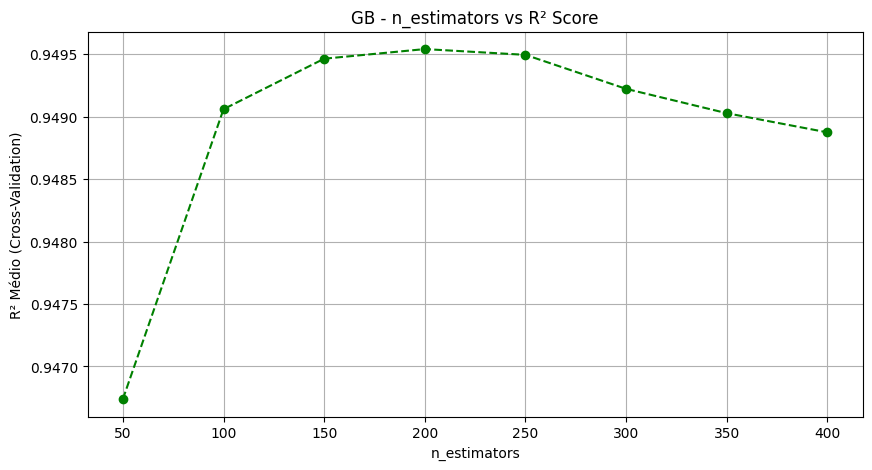

Melhor n_estimators: 200
MSE no teste: 0.30
R² no teste: 0.95


In [169]:
from sklearn.ensemble import GradientBoostingRegressor

# Testando diferentes valores de n_estimators
n_estimators_values = range(50, 401, 50)
r2_scores = []

for n in n_estimators_values:
    model = GradientBoostingRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    r2_scores.append(scores.mean())


plotValuesRegressor('n_estimators', 'GB - n_estimators vs R² Score',
                    n_estimators_values, r2_scores, 'linear')


# Melhor n_estimators
best_n = n_estimators_values[r2_scores.index(max(r2_scores))]
print(f"Melhor n_estimators: {best_n}")

# Treinando e avaliando
model = GradientBoostingRegressor(n_estimators=best_n, random_state=42)

trainModelRegressor(model, 'gradient_regressor_model.pkl')


#Possíveis causas para os resultados:

#Random e Gradient: 93 %

- Random Forest e Gradient obtiveram 93% de precisão. Isso pode ter acontecido por serem modelos baseados em árvores, robustos para dados estruturados, conseguindo desta forma uma alta precisão

- Gradient Boosting se adapta melhor a padrões complexos e com pouco ruído.

- Já o Random Forest consegue generalizar melhor dados bastante ruídosos.

# KNN e SVM: 91% e 87% -> 91% (melhorado)

- O KNN obteve 91%, enquanto que o SVM 87%.

- O KNN funciona a partir da proximidade com os k-vizinhos. Sendo assim, aparentemente a distribuição dos dados tem padrões locais bem definidos, o que permite uma boa classificação por proximidade.

- Já o SVM obteve uma pontuação menor. Isto sugere que aparentemente os dados não estão linearmente separáveis da melhor forma com o hiperplano escolhido, fazendo com que o seu desempenho tenha sido inferior.

# Temos algumas possibilidades:

- Overfitting do KNN e SVM: Dado que eles se baseiam em proximidade e margens, podem estar superajustando a padrões do conjunto de treino e não captando corretamente as variações sazonais, resultando em uma acurácia menor.

- Generalização melhor do RF e GB: Como esses modelos usam múltiplas árvores, podem ter captado um padrão global mais robusto, que identifica mudanças sazonais reais.

- Sendo assim, pode-se concluir que um modelo de múltiplas árvores se adapta melhor ao dataset, enquanto que algoritmos baseados em proximidade e margens (como KNN e SVM) tendem a ter um desempenho inferior.


- Impacto das features escolhidas: **hive_temp**, **hive_humidity**,  **hive_pressure**, **weather_temp**, **weather_humidity**, **weather_pressure**, **rain**, **wind_speed**.
- Foram escolhidas as features relacionadas a temperatura, umidade relativa do ar e pressão, tanto de dentro da comeia (hive) como do ambiente externo (weather). Também foram escolhidas a velocidade do vento e a presença ou não de chuva.

#Analisando o peso das features em cada modelo

In [ ]:
def analisaFeatures(nameArchive, model, color):
  #Carregando o modelo Random Forest e gradient boosting
  rf_model = joblib.load(f'/content/{nameArchive}')

  #Obtendo a importância das features
  feature_importances = rf_model.feature_importances_
  #Definindo os nomes das features usadas no treinamento
  features = ['hive temp', 'hive humidity', 'hive pressure',
              'weather temp',
              'weather humidity', 'weather pressure',
              'wind speed', 'rain'
              ]

  importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
  importance_df = importance_df.sort_values(by='Importance', ascending=False)


  #Plotando
  plt.figure(figsize=(5, 3))
  plt.barh(importance_df['Feature'], importance_df['Importance'], color=f'{color}')
  plt.xlabel('Importância')
  plt.ylabel('Feature')
  plt.title(f'Importância das Features - {model} ')
  plt.gca().invert_yaxis()  # Inverte a ordem para ficar da maior para a menor
  plt.show()

  print(f'Peso das variáveis do modelo {model}\n', importance_df)

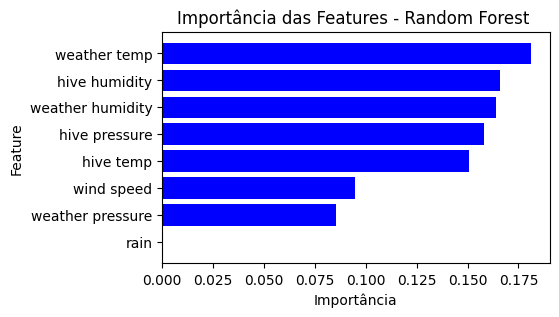

Peso das variáveis do modelo Random Forest
             Feature  Importance
3      weather temp    0.181196
1     hive humidity    0.165754
4  weather humidity    0.164150
2     hive pressure    0.158271
0         hive temp    0.150731
6        wind speed    0.094700
5  weather pressure    0.085199
7              rain    0.000000


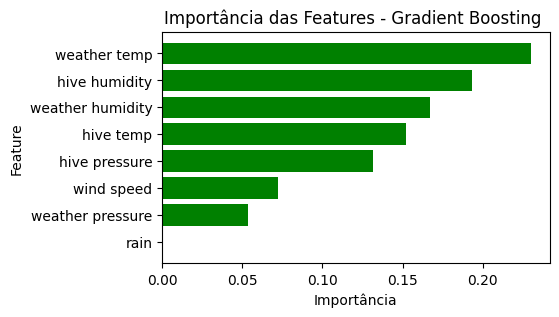

Peso das variáveis do modelo Gradient Boosting
             Feature  Importance
3      weather temp    0.230048
1     hive humidity    0.193174
4  weather humidity    0.166845
0         hive temp    0.152297
2     hive pressure    0.131442
6        wind speed    0.072315
5  weather pressure    0.053880
7              rain    0.000000


In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

#Carregando o modelo Random Forest e gradient boosting

analisaFeatures('random_forest_queen_model.pkl', 'Random Forest', 'b')
analisaFeatures('gradient_boosting_queen_model.pkl', 'Gradient Boosting', 'g')


In [ ]:
def analisaFeatures_SVM_KNN(nameArchive, nameModel, color):
  # Carregando os modelos SVM e KNN
  model = joblib.load(f'{nameArchive}')

  # Carregando o dataset
  df = pd.read_csv('all_data_updated_att.csv')  # Substitua pelo nome correto do arquivo
  features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
              'weather humidity', 'weather pressure', 'wind speed', 'rain']
  X = df[features]
  y = df['queen presence']

  # Calculando a importância das features para o SVM
  importance = permutation_importance(model, X, y, scoring='accuracy', random_state=42)
  feature_importances = importance.importances_mean

  # Criando DataFrame para visualização
  importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
  importance_df = importance_df.sort_values(by='Importance', ascending=False)

  #Plotando
  plt.figure(figsize=(5, 3))
  plt.barh(importance_df['Feature'], importance_df['Importance'], color=f'{color}')
  plt.xlabel('Importância')
  plt.ylabel('Feature')
  plt.title(f'Importância das Features - {nameModel} ')
  plt.gca().invert_yaxis()  # Inverte a ordem para ficar da maior para a menor
  plt.show()

  print(f'Peso das variáveis do modelo {model}\n', importance_df)

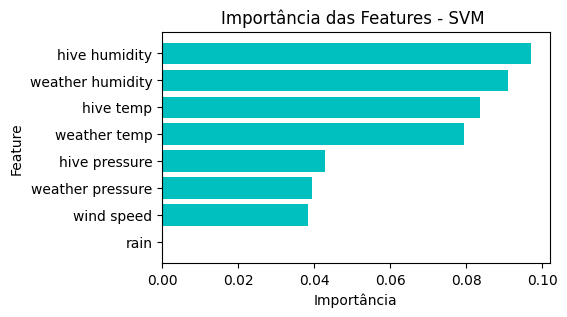

Peso das variáveis do modelo SVC(C=2, gamma=0.08, probability=True, random_state=42)
             Feature  Importance
1     hive humidity    0.097098
4  weather humidity    0.091137
0         hive temp    0.083765
3      weather temp    0.079529
2     hive pressure    0.042824
5  weather pressure    0.039373
6        wind speed    0.038275
7              rain    0.000000


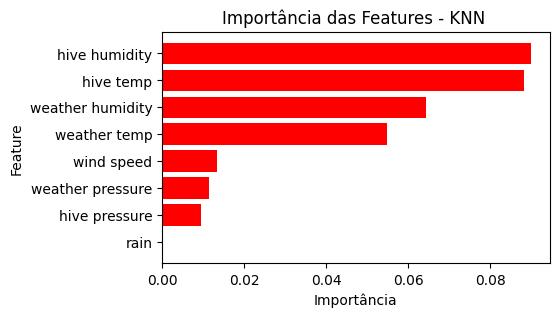

Peso das variáveis do modelo KNeighborsClassifier(n_neighbors=3)
             Feature  Importance
1     hive humidity    0.089882
0         hive temp    0.088157
4  weather humidity    0.064314
3      weather temp    0.054745
6        wind speed    0.013490
5  weather pressure    0.011451
2     hive pressure    0.009569
7              rain    0.000000


"\n# Carregando os modelos SVM e KNN\nsvm_model = joblib.load('svm_queen_model.pkl')\nknn_model = joblib.load('knn_queen_model.pkl')\n\n# Carregando o dataset\ndf = pd.read_csv('all_data_updated_att.csv')  # Substitua pelo nome correto do arquivo\nfeatures = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',\n            'weather humidity', 'weather pressure', 'wind speed', 'rain']\nX = df[features]\ny = df['queen presence']\n\n# Calculando a importância das features para o SVM\nsvm_importance = permutation_importance(svm_model, X, y, scoring='accuracy', random_state=42)\nsvm_feature_importances = svm_importance.importances_mean\n\n# Calculando a importância das features para o KNN\nknn_importance = permutation_importance(knn_model, X, y, scoring='accuracy', random_state=42)\nknn_feature_importances = knn_importance.importances_mean\n\n# Criando DataFrame para visualização\nimportance_df_svm = pd.DataFrame({'Feature': features, 'Importance': svm_feature_importances})\nimpo

In [ ]:
from sklearn.inspection import permutation_importance
import joblib
import pandas as pd
import matplotlib.pyplot as plt

analisaFeatures_SVM_KNN('svm_queen_model.pkl', 'SVM', 'c')
analisaFeatures_SVM_KNN('knn_queen_model.pkl', 'KNN', 'r')
'''
# Carregando os modelos SVM e KNN
svm_model = joblib.load('svm_queen_model.pkl')
knn_model = joblib.load('knn_queen_model.pkl')

# Carregando o dataset
df = pd.read_csv('all_data_updated_att.csv')  # Substitua pelo nome correto do arquivo
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']
X = df[features]
y = df['queen presence']

# Calculando a importância das features para o SVM
svm_importance = permutation_importance(svm_model, X, y, scoring='accuracy', random_state=42)
svm_feature_importances = svm_importance.importances_mean

# Calculando a importância das features para o KNN
knn_importance = permutation_importance(knn_model, X, y, scoring='accuracy', random_state=42)
knn_feature_importances = knn_importance.importances_mean

# Criando DataFrame para visualização
importance_df_svm = pd.DataFrame({'Feature': features, 'Importance': svm_feature_importances})
importance_df_svm = importance_df_svm.sort_values(by='Importance', ascending=False)

importance_df_knn = pd.DataFrame({'Feature': features, 'Importance': knn_feature_importances})
importance_df_knn = importance_df_knn.sort_values(by='Importance', ascending=False)

# Plotando as importâncias das features para SVM e KNN
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#Gráfico SVM
ax[0].barh(importance_df_svm['Feature'], importance_df_svm['Importance'], color='g')
ax[0].set_xlabel('Importância')
ax[0].set_ylabel('Feature')
ax[0].set_title('Importância das Features - SVM')

#Gráfico KNN
ax[1].barh(importance_df_knn['Feature'], importance_df_knn['Importance'], color='r')
ax[1].set_xlabel('Importância')
ax[1].set_ylabel('Feature')
ax[1].set_title('Importância das Features - KNN')

# Invertendo o eixo Y para exibir a maior importância no topo
for axis in ax:
    axis.invert_yaxis()

plt.tight_layout()
plt.show()'''


#Análise:

- De forma geral, as variáveis relacionadas a temperatura e umidade relativa do ar tiveram maior impacto nos modelos treinados, sendo a temperatura externa a mais impactante nos modelos do Random Forest Classifier e Gradient Boosting. Nos modelos SVM e KNN, a umidade relativa obteve um maior peso.

- A pressão, de forma geral, teve um menor peso em todos os modelos, tanto interna como externa. A velocidade do vento também teve um peso menor.

- A presença ou não de chuva teve um peso nulo.

- Sendo assim, se quisermos aperfeiçoarmos o modelo teríamos que focar nas features relacionadas a temperatura e umidade relativa do ar, ver se seria possível normalizar ainda mais e retirar possíveis outliers.


- Algo estava errado com o modelo SVM, pois os valores do hiperparâmetro C ficavam travados em 87% no treino para diferentes valores C. Creio que o modelo estava se superajustando aos dados e ficando insensível a mudanças. Sendo assim, foi realizado a mudança do parâmetro (ou incluído, não me lembro) gamma que, para pequenos valores, como 0.001, o modelo considera padrões mais gerais, enquanto que, para altos valores, como 10, o modelo considera padrões muito locais (podendo levar a overfitting). Sendo assim, optei pelo valor meio-termo 0.1.

- Mais uma observação: agora a tabela do SVM está funcionando, embora não apresente em formato de 100% os pesos. KNN formato peso de +-30% e SVM formato peso de +-45%.
